<a href="https://colab.research.google.com/github/alimadani/Dimension_reduction/blob/master/Dimention_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimentional Reduction

## Why is Dimensionality Reduction required?


1.   Space required to store the data is reduced as the number of dimensions comes down
2.   Less dimensions lead to less computation/training time
3.   Some algorithms do not perform well when we have a large dimensions. So reducing these dimensions needs to happen for the algorithm to be useful
4.  It takes care of multicollinearity by removing redundant features.
5.  It helps in visualizing data. It is very difficult to visualize data in higher dimensions so reducing our space to 2D or 3D may allow us to plot and observe patterns more clearly

**Dimensionality reduction can be done in two different ways:**


1.   By only keeping the most relevant variables from the original dataset (this technique is called feature selection)
2.  By finding a smaller set of new variables, each being a combination of the input variables, containing basically the same information as the input variables (this technique is called dimensionality reduction)

**Common Dimensionality Reduction and Feature Selection Techniques**


*   Missing Value Ratio
*   Low Variance Filter
*   High Correlation filter
*   Random Forest
*   Backward Feature Elimination
*   Forward Feature Selection
*   Factor Analysis
*   Principal Component Analysis (PCA)
*   Independent Component Analysis
*   Methods Based on Projections
*   t- Distributed Stochastic Neighbor Embedding (t-SNE)
*   UMAP





 # Dimensionality Reduction Visualizations


First, we need to import numpy, matplotlib, and scikit-learn and get the MNIST data. Scikit-learn already comes with the MNIST data (or will automatically download it for you) so we don’t have to deal with uncompressing it ourselves! Additionally, I’ve provided a function that will produce a nice visualization of our data.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, discriminant_analysis
 


In [0]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape

In [0]:

 
def embedding_plot(X, title):    ## In this function we plot the data 
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
    colormap = cm.rainbow(np.linspace(0, 1, 10))
    plt.figure()
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=colormap[y])
 
    shown_images = np.array([[1., 1.]])
    for i in range(X.shape[0]):
        if np.min(np.sum((X[i] - shown_images) ** 2, axis=1)) < 1e-2: continue
        shown_images = np.r_[shown_images, [X[i]]]
        ax.add_artist(offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]))
 
    plt.xticks([]), plt.yticks([])
    plt.title(title)

Using any of the dimensionality reduction techniques that we’ve discussed in scikit-learn is trivial! We can get PCA working in just a few lines of code!

## Factor Analysis

In [0]:
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 10).fit_transform(X)
#embedding_plot(FA, "Factor Analysis")
#plt.show()

## PCA

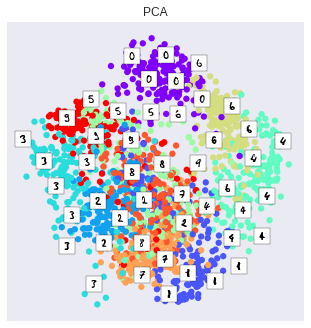

In [0]:
X_pca = decomposition.PCA(n_components=2).fit_transform(X)
embedding_plot(X_pca, "PCA")
plt.show()

## LDA

Now let’s use LDA  to visualize the same data. Just like PCA, using LDA in scikit-learn is very easy! Notice that we have to also give the class labels since LDA is supervised!

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


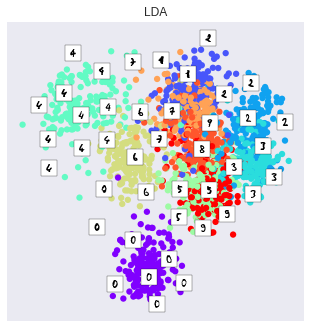

In [0]:
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
embedding_plot(X_lda, "LDA")
 
plt.show()

## t-SNE
Finally, let’s use t-SNE to visualize the MNIST data. We’re initializing the embedding to use PCA (in accordance with Laurens Van Der Maaten’s recommendations). Unlike LDA, t-SNE is completely unsupervised.

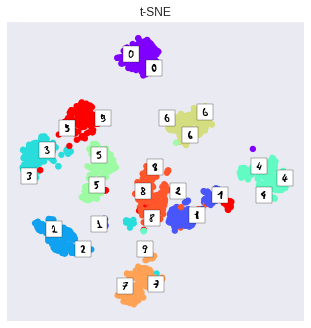

In [0]:
X_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(X)
embedding_plot(X_tsne,"t-SNE")
 
plt.show()

## ICA

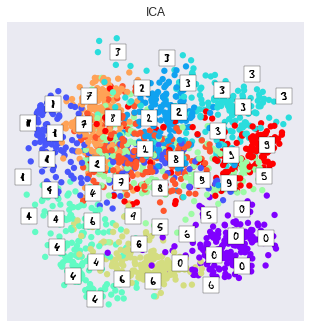

In [0]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=2, random_state=5).fit_transform(X) 
embedding_plot(ICA,"ICA")
plt.show()

## UMAP

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


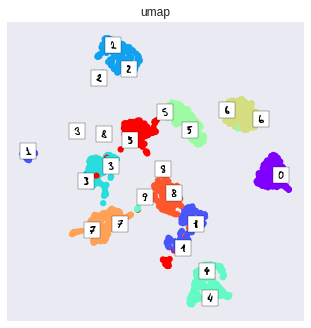

In [0]:
import umap
umap = umap.UMAP(n_neighbors=5, min_dist=0.4, n_components=2).fit_transform(X)
embedding_plot(umap,"umap")
plt.show()